In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
def gen_random_sphere(n_points):
    r = random.random(n_points)
    phi = random.random(n_points) * 2.0 * pi
    costheta = 2.0*(random.random(n_points) -0.5)
    theta = arccos(costheta)
    x = r * sin(theta) * cos(phi)
    y = r * sin(theta) * sin(phi)
    z = r * cos(theta)
    return x, y, z

In [11]:
def inertiaTensor(x, y, z):
	I=[]
	for index in range(9):
        	I.append(0)

	I[0] = np.sum(y*y+z*z) 
	I[1] = np.sum(-y*x)    
	I[2] = np.sum(-x*z)    
	I[3] = np.sum(-y*x)    
	I[4] = np.sum(x*x+z*z) 
	I[5] = np.sum(-y*z)    
	I[6] = np.sum(-z*x)    
	I[7] = np.sum(-z*y)    
	I[8] = np.sum(x*x+y*y) 

	tensor = np.array([(I[0:3]), (I[3:6]), (I[6:9])])
	vals, vects = np.linalg.eig(tensor)  # they come out unsorted, so the command below is needed
	eig_ord = np.argsort(vals)  # a thing to note is that here COLUMN i corrensponds to eigenvalue i.
	ord_vals = vals[eig_ord]
	ord_vects = vects[:, eig_ord].T

	TriaxParam = (ord_vals[2]*ord_vals[2]-ord_vals[1]*ord_vals[1])/(ord_vals[2]*ord_vals[2]-ord_vals[0]*ord_vals[0])
	AxisRatio = ord_vals[0]/ord_vals[2]
	return ord_vals, ord_vects, TriaxParam, AxisRatio

In [12]:
def sample_cos_ABX(N_A=10, N_B=10):
    x, y, z = gen_random_sphere(N_A)
    eigenval, eigenvec, triax, axis_ratio = inertiaTensor(x,y,z)
    main_eigenvec_A = eigenvec[2]/sum(eigenvec[2]**2)

    x, y, z = gen_random_sphere(N_B)
    eigenval, eigenvec, triax, axis_ratio = inertiaTensor(x,y,z)
    main_eigenvec_B = eigenvec[2]/sum(eigenvec[2]**2)

    cos_AB = abs(sum(main_eigenvec_A * main_eigenvec_B))
    cos_AX = abs(main_eigenvec_A[0])
    cos_BX = abs(main_eigenvec_B[0])
    return cos_AB, cos_AX, cos_BX


In [13]:
def sample_pairs(M=10, N_A=10, N_B=10):
    cos_AB_array = zeros(M)
    cos_AX_array = zeros(M)
    cos_BX_array = zeros(M)

    for i in range(M):
        cos_AB_array[i], cos_AX_array[i], cos_BX_array[i] = sample_cos_ABX(N_A=N_A, N_B=N_B)
        
    cos_AB_array.sort()
    cos_AX_array.sort()
    cos_BX_array.sort()
    return cos_AB_array, cos_AX_array, cos_BX_array

In [15]:
n_monte_carlo = 1000
median_AB = zeros(n_monte_carlo)
median_AX = zeros(n_monte_carlo)
median_BX = zeros(n_monte_carlo)

M = 50
N_A = 15
N_B = 5
for i in range(n_monte_carlo):
    d_AB, d_AX, d_BX = sample_pairs(M=M, N_A=N_A, N_B=N_B)
    median_AB[i] = median(d_AB)
    median_AX[i] = median(d_AX)
    median_BX[i] = median(d_BX)

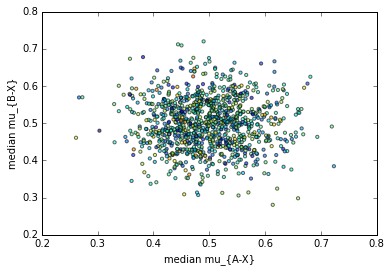

In [84]:

scatter(median_AX, median_BX, alpha=0.6, c=median_AB, s=10)
xlabel('median mu_{A-X}')
ylabel('median mu_{B-X}')